In [1]:
from Utils_16S_Analysis import *
from Utils_MSA import *

rcParams = {'font.size': 12, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal', 'axes.labelsize' : 10}
plt.rcParams.update(rcParams)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from copy import deepcopy

def Get_Alignment_Ranges(out, st, en, window = 150):
    alpha_list, beta_list = [], []
    for i in range(st, en-window):
        start, end = i, i+window
        alpha = out['Alpha'][start:end]
        beta = out['Beta'][start:end]
        gamma = out['Gamma'][start:end]
        
        e, alpha_align_table = Edit(alpha, gamma)
        alpha_align, gamma_align = Return_Alignments(alpha_align_table, alpha, gamma)
        c = 0
        for j in range(0, len(alpha_align)):
            if (alpha_align[j] != "-") and (gamma_align[j] != "-") and (alpha_align[j] != gamma_align[j]):
                c += 1
        alpha_list.append(c)
        
        e, beta_align_table = Edit(beta, gamma)
        beta_align, gamma_align = Return_Alignments(beta_align_table, beta, gamma)
        c = 0
        for j in range(0, len(beta_align)):
            if (beta_align[j] != "-") and (gamma_align[j] != "-") and (beta_align[j] != gamma_align[j]):
                c += 1
        beta_list.append(c)
    return min(alpha_list), max(alpha_list), min(beta_list), max(beta_list)


In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Read_Alignments/'
samples = listdir(filedir+'Alpha_Alleles/paf_files/')

fdir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Gene_Segments/'
out = {}
for f in ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']:
    lines = open(fdir+f+'.fna').readlines()
    s = ''
    for l in lines:
        if not l.startswith('>'):
            s += l.replace("\n","")
    out[f.replace("Synechococcus_","").replace("_16SrRNA","")] = s


In [3]:
df_op = pd.DataFrame()
df_all_abundances = pd.DataFrame()
Samples = {}

for s in samples:
    MisMatches = {}
    
    print(s)
    Temp = pd.DataFrame()
    
    df_alpha = Load_PAF(filedir+'Alpha_Alleles/paf_files/'+s, s)
    df_beta = Load_PAF(filedir+'Beta_Alleles/paf_files/'+s, s)
    df_gamma = Load_PAF(filedir+'Gamma_Alleles/paf_files/'+s, s)
    
    Temp = Temp.append(df_alpha).append(df_beta).append(df_gamma)
    Temp = Temp[Temp['SEnd'] < 1300]
    Temp['Subject'] = Temp['Subject'].str.replace("Synechococcus_","")
    Temp['Subject'] = Temp['Subject'].str.replace("_16SrRNA","")
    Temp['Divergence'] = Temp['MisMatches']/150*100
    
    df_all_abundances = df_all_abundances.append(Temp, ignore_index = True)
    
    Mismatches = Temp['MisMatches'].unique()
    for m in Mismatches:
        df_filt = Temp[Temp['MisMatches'] == m]
        CS_strings = df_filt['CS'].tolist()
        SStarts = df_filt['SStart'].tolist()
        SEnds = df_filt['SEnd'].tolist()
        subjects = df_filt['Subject'].tolist()
    
        Alignment_profile = {'Alpha':{'A':np.zeros(1300),'C':np.zeros(1300),
                                          'G':np.zeros(1300),'T':np.zeros(1300)},
                                 'Beta':{'A':np.zeros(1300),'C':np.zeros(1300),
                                         'G':np.zeros(1300),'T':np.zeros(1300)},
                                 'Gamma':{'A':np.zeros(1300),'C':np.zeros(1300),
                                          'G':np.zeros(1300),'T':np.zeros(1300)}}
        
        for i in range(0, len(CS_strings)):
            out_string = Parse_CS_String(CS_strings[i].replace("cs:Z:",""), 
                                         out[subjects[i]][SStarts[i]:SEnds[i]])
            AP = Generate_Alignment_Profile(out_string)
            for n in ['A','C','G','T']:
                Alignment_profile[subjects[i]][n][SStarts[i]:SEnds[i]] += AP[n]
        MisMatches[m] = Alignment_profile
    Samples[s.replace("_FD.paf","")] = MisMatches
    df_op = df_op.append(Temp, ignore_index = True)

HotsprSampleMS50_FD.paf
2570 20141
246 19782
4826 24805
HotsprottomLayer_2_FD.paf
2479 9628
635 7970
5184 13651
Hotspr2Sample149_FD.paf
1575 12379
328 11492
5117 17915
HotsprSampleR4cd_FD.paf
8921 68903
556 68411
16789 84655
HotsprSampOS1265_FD.paf
365 23271
192 22459
1427 27198
HotsprSampleOS50_FD.paf
1671 12940
291 12749
2192 14706
HotsprSampleOS60_FD.paf
1542 45194
384 42930
5497 54200
HotsprOSTMatCore_FD.paf
2212 5220
324 3756
5211 9183
Hotspr20SampleT9_FD.paf
3005 36965
289 35302
6144 44688
HotsprSampleMSe2_FD.paf
3565 30294
294 29627
6476 36821
HotsprSampleMSe3_FD.paf
2517 23647
291 22793
5509 29705
HotsprSampleMS13_FD.paf
3420 27649
378 26835
7093 34777
Hotspr20SampleP4_FD.paf
4480 60428
594 56763
10202 73577
HotsprSampleOSM1_FD.paf
944 43054
545 42032
4660 51885
HotsprSampOS1260_FD.paf
717 40258
365 39356
3818 48132
HotsprSampleMSe1_FD.paf
2968 27597
233 26713
5414 33473
HotsprSampleMS60_FD.paf
1438 22590
228 22201
4055 28078
HotsprSampleMSe4_FD.paf
3958 39442
335 38450
7347 47

In [33]:
mismatches = []
D = 0
for s in Samples:
    mis_mat = Samples[s].keys()
    if max(mis_mat)/150*100 > D:
        D = max(mis_mat)/150*100
        
out_mat = {}
nucleotides = ['A','C','G', 'T']

for d in np.arange(1, D):
    max_mismat = d*150/100
    df_temp = pd.DataFrame()
    for g in ['Alpha','Beta','Gamma']:
        data = []
        for n in nucleotides:
            c = np.zeros(1300)
            for s in Samples:
                for m in Samples[s]:
                    if m < max_mismat: 
                        c += Samples[s][m][g][n]
            data.append(c)
        df_norm = pd.DataFrame(columns = nucleotides, data = np.transpose(data))
        df_norm = df_norm.div(df_norm.sum(axis=1), axis = 0)
        df_norm['Sum'] = df_norm.sum(axis = 1)
        df_temp[g] = np.zeros(1300)
        for i in range(len(nucleotides)):
            df_temp[g] += df_norm[nucleotides[i]]*(df_norm['Sum']-df_norm[nucleotides[i]])
        df_temp[g] /= 2
    out_mat[d] = df_temp.rolling(200).mean()[200:].reset_index()
    

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0


In [34]:
s,e = 400, 600
ms_samples = ['HotsprSampleMS50','HotsprSampleMS55','HotsprSampleMS60','HotsprSampleMS65']
df_ms = df_op[(df_op['SStart'] >= s) & (df_op['SEnd'] <= e) & (df_op['Sample'].isin(ms_samples))]
df_ms['Divergence'] = df_ms['MisMatches']/df_ms['QLen']*100.0
df_ms_grp_samples_400 = df_ms.groupby(['Subject','Sample',
                                       'MisMatches','Divergence']).apply(Coverage_Stats,
                                                                         slen = 1300,length = 200).reset_index()
df_ms_grp_samples_400 = df_ms_grp_samples_400[df_ms_grp_samples_400['Subject'] == 'Gamma']
df_ms_grp_samples_400 = df_ms_grp_samples_400.set_index('Sample')
alpha_min_400, alpha_max_400, beta_min_400, beta_max_400 = Get_Alignment_Ranges(out, s, e)

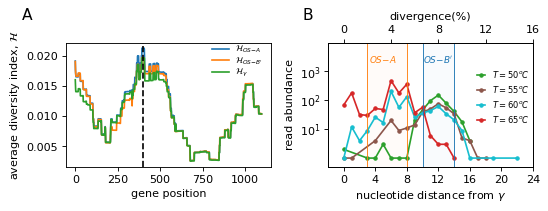

In [36]:
plt.rcParams.update(rcParams)
outpath = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'

fig, ax = plt.subplots(1,2, figsize = (7.01,0.8*3.43), dpi = 80, sharex = False, sharey = False)

colors = ['C2','C5','C9','C13']

ax[0].plot(out_mat[8]['Alpha'].tolist(), color = 'C0', linewidth = 1.5, label = r'$\mathcal{H}_{OS\minus A}$')
ax[0].plot(out_mat[8]['Beta'].tolist(), color = 'C1', linewidth = 1.5, label = r'$\mathcal{H}_{OS\minus B^\prime}$')
ax[0].plot(out_mat[8]['Gamma'].tolist(), color = 'C2', linewidth = 1.5, label = r'$\mathcal{H}_\gamma$')
ax[0].axvline(400, color = 'black', linestyle = '--')
ax[0].legend(ncol = 1, loc = 1, frameon = False, fontsize = 7.5, bbox_to_anchor=(1,1.05),
             labelspacing=0.01, columnspacing = 0.024)
ax[0].tick_params(axis='both', labelsize=10)
ax[0].set_xlabel('gene position')
ax[0].set_ylabel(r'average diversity index, $\mathcal{H}$')

ax[1] = Plot_Divergence(df_ms_grp_samples_400, ax[1], ms_samples, 
                        r'nucleotide distance from $\gamma$' , 'read abundance', 'divergence(%)', 
                        True, [r'$T=50^oC$', r'$T=55^oC$', r'$T=60^oC$', r'$T=65^oC$'],  y = 'Num_Reads', 
                        read_length = 150, colors = colors, lw = 1.5, ms = 3)

ax[1].set_yticks([10,100,1000])
ax[1].axvline(alpha_min_400, color = 'C1', linewidth = 0.8)
ax[1].axvline(alpha_max_400, color = 'C1', linewidth = 0.8)
ax[1].axvspan(alpha_min_400, alpha_max_400, color = 'C1', alpha = 0.025)
ax[1].axvline(beta_min_400, color = 'C0', linewidth = 0.8)
ax[1].axvline(beta_max_400, color = 'C0', linewidth = 0.8)
ax[1].axvspan(beta_min_400, beta_max_400, color = 'C0', alpha = 0.025)
ax[1].text(x = alpha_min_400+0.15, y = 2000, s = r'$OS\minus A$', c = 'C1', size = 8)
ax[1].text(x = beta_min_400+0.075, y = 2000, s = r'$OS\minus B^{\prime}$', c = 'C0', size = 8)
ax[1].set_ylim([0.5,10000])

fig.text(0.05,0.9,'A', size = 14)
fig.text(0.55,0.9,'B', size = 14)

fig.tight_layout()
fig.savefig(outpath+'Fig-S11.pdf')
